In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
temp = pd.DataFrame(np.array([[0,1,2], iris.target_names]).T, columns=['label', 'name'])
temp.label = temp.label.astype('int')
df = pd.merge(df, temp, on='label', how='left') 
df = df[df.label.isin([0,1])]
df.columns = pd.Series(df.columns).str.replace(' \(cm\)', '')
df.columns = ['_'.join(x for x in col) for col in df.columns.str.split(' ')] 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


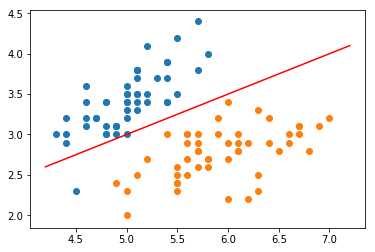

In [4]:
plt.scatter(x='sepal_length', y='sepal_width', data=df[df.label==0])
plt.scatter(x='sepal_length', y='sepal_width', data=df[df.label==1])
params = np.array([.5, -1.0, 0.5])
x_space = np.linspace(4.2, 7.2, 100)
y_space = x_space * (params[0] / - params[1]) + (params[2] / - params[1])
plt.plot(x_space, y_space, c='r')
plt.show()

<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>

$$y = 2x + 1$$

<br>
<br>
<br>
<br>

In [5]:
f = lambda x: 2 * x + 1

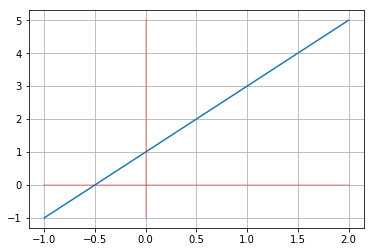

In [6]:
x_space = np.linspace(-1, 2)
y_space = f(x_space)
plt.plot(x_space, y_space)
plt.plot([-1, 2], [0, 0], c='r', alpha=.3)
plt.plot([0, 0], [-1, 5], c='r', alpha=.3)
#plt.scatter(x=[0],
#            y=[1])
plt.grid()
plt.show()

<br>
<br>
<br>
<br>

$$0 = 2x - y + 1$$

<br>
<br>
<br>
<br>

$$0 \neq 2x - y + 1 ?$$

<br>
<br>
<br>
<br>

\begin{align}
z &= ax_1 + bx_2 + c \\
&=wX
\end{align}

In [7]:
x1 = df.sepal_length
x2 = df.sepal_width
intercept = np.array([1] * len(df))

<br>
\begin{align}
sigmoid(z) &= \frac {1}{1+e^{-z}}
\end{align}

In [8]:
sigmoid = # (write your code here)

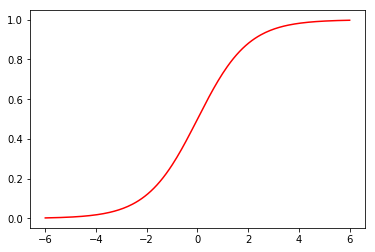

In [9]:
x_space = np.linspace(-6, 6, 200)
y_space = [sigmoid(x) for x in x_space]
plt.plot(x_space, y_space, c='r')
plt.show()

In [10]:
print(params)

[ 0.5 -1.   0.5]


In [11]:
z = # (write your code here)
pred = sigmoid(z)
res = pd.DataFrame(np.array([x1, x2, z, pred, 1-pred]).T, columns=['sepal_length', 'sepal_width', 'z', 'proba(c=1)', 'proba(c=0)'])
res = pd.concat([df[['label', 'name']], res], axis=1)
res['pred_label'] = 0
res.pred_label[res['proba(c=1)'] > 0.5] = 1
res.tail()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,label,name,sepal_length,sepal_width,z,proba(c=1),proba(c=0),pred_label
95,1,versicolor,5.7,3.0,0.35,0.586618,0.413382,1
96,1,versicolor,5.7,2.9,0.45,0.610639,0.389361,1
97,1,versicolor,6.2,2.9,0.70,0.668188,0.331812,1
98,1,versicolor,5.1,2.5,0.55,0.634136,0.365864,1
99,1,versicolor,5.7,2.8,0.55,0.634136,0.365864,1


In [12]:
res[res.label != res.pred_label]

,label,name,sepal_length,sepal_width,z,proba(c=1),proba(c=0),pred_label
41,0,setosa,4.5,2.3,0.45,0.610639,0.389361,1


<br>
<br>
<br>
<br>

<br>
#### Cross-Entropy

$$-y\log\hat{y}-(1-y)\log(1-\hat{y})$$

<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>

<br>
#### Define Loss Function

$$L(y, \hat{y}) = \sum_{i=1}^{n}-y_i\log\hat{y_i}-(1-y_i)\log(1-\hat{y_i})$$

<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>

In [13]:
loss_function = # (write your code here)

In [14]:
params = np.array([.5, -1.0, 0.5])
z = params[0] * x1 + params[1] * x2 + params[2] * 1
pred = sigmoid(z)
loss_function(df.label, pred)

46.412504132481494

<br>
#### Objective

\begin{align}
O &= min(L) \\
&= min(\sum_{i=1}^{n}-y_i\log\hat{y_i}-(1-y_i)\log(1-\hat{y_i}))
\end{align}

<br>
<br>
<br>
<br>

<br>
#### Calculate Gradient

\begin{align}
\nabla L &= \begin{bmatrix}
               \frac{\partial}{\partial w_0}L(\theta) \\
               \frac{\partial}{\partial w_1}L(\theta) \\
               ...\\
               \frac{\partial}{\partial w_j}L(\theta) \\
               \end{bmatrix}
\end{align}

<br>
<br>
<br>
<br>

<br>
\begin{align}
\frac{\partial}{\partial \theta}L(\theta = w_0, w_1, ..., w_j) &= \frac{\partial}{\partial \theta} \sum_{i=1}^{n}-y_i\log\hat{y_i}-(1-y_i)\log(1-\hat{y_i})\\
&= \sum_{i=1}^{n}\frac{\partial}{\partial \theta}(-y_i\log\hat{y_i}-(1-y_i)\log(1-\hat{y_i})) \\
&= \sum_{i=1}^{n}\frac{\partial}{\partial \hat{y_i}}(-y_i\log\hat{y_i}-(1-y_i)\log(1-\hat{y_i}))\frac{\partial}{\partial \theta}\hat{y_i} \\
&= \sum_{i=1}^{n}(-\frac{y_i}{\hat{y_i}} - \frac{-(1-y_i)}{1-\hat{y_i}}) \cdot \frac{\partial}{\partial \theta}\hat{y_i} \\
&= \sum_{i=1}^{n}(-\frac{y_i}{\hat{y_i}} + \frac{(1-y_i)}{1-\hat{y_i}}) \cdot \frac{\partial}{\partial \theta}\sigma(z) \\
&= \sum_{i=1}^{n}(-\frac{y_i}{\hat{y_i}} + \frac{(1-y_i)}{1-\hat{y_i}}) \cdot \hat{y_i}(1 - \hat{y_i})x_i \space [1]\\
&= \sum_{i=1}^{n}(-y_i(1-\hat{y_i}) + (1 - {y_i})\hat{y_i})x_j \\
&= \sum_{i=1}^{n}(-y_i + y_i\hat{y_i} + \hat{y_i} - {y_i}\hat{y_i})x_j \\
&= \sum_{i=1}^{n}(\hat{y_i} - {y_i})x_j
\\
\\
[1]\frac{\partial}{\partial \theta}\sigma(z) &= \frac{\partial}{\partial \theta} (\frac{1}{1 + e^{-z}})\cdot \frac{\partial}{\partial \theta}z \\
&= \frac{\partial}{\partial z} (1 + e^{-z})^{-1} \cdot (x_i) &\because \frac{\partial}{\partial \theta}z = \frac{\partial}{\partial \theta}(w_1 x_1 + w_2 x_2 + ... +w_i x_i) = x_i \\
&= \frac{\partial}{\partial \theta} (1 + e^{-z})^{-2} (1 + e^{-z}) x_i \\
&= (1 + e^{-z})^{-2} \frac{\partial}{\partial \theta} (1 + e^{-z}) x_i \\
&= \frac{e^{-z}}{(1 + e^{-z})^{2}} x_i \\
&= \frac{1}{1 + e^{-z}} \cdot \frac{e^{-z}}{1 + e^{-z}} x_i \\
&= \frac{1}{1 + e^{-z}} \cdot (1 - \frac{1}{1 + e^{-z}}) x_i\\
&= \sigma(z)(1 - \sigma(z)) x_i \\
&= \hat{y_i}(1 - \hat{y_i}) x_i \\
\end{align}

In [15]:
gradient = lambda # (write your code here) HINT: list comprehension e.g. [x for x in arr]

<br>
<br>
<br>
<br>

<br>
\begin{equation}
w_j^{k+1} = a^{k} - \text{learning_rate} \times f^\prime(w_j^{k}) \\
\end{equation}

In [16]:
def steepest_gradient_descent(loss_function, features, label, activation, gradient, init, epoch, learning_rate, verbose=False):
    # monitoring
    params = np.array(init)
    params_path = []
    loss_path = []
    slope_path = []
    step_path = []
    
    
    for i in range(epoch):
        # 0. record parameters path
        params_path.append(params)
        
        # 1. calculate probability
        pred = # (write your code here)
        
        # 2. calculate loss
        loss = # (write your code here)
        loss_path.append(loss)
        
        # 3. calculate slope with gradient
        slope = # (write your code here)
        slope_path.append(slope)
        
        # 4. calculate step
        step = # (write your code here)
        step_path.append(step)
        
        # verbose
        if verbose == True:
            log = '{} a:{}, b:{}, c:{}, loss:{}, slope:{}, step:{}'
            print(log.format(i, round(params[0],3), round(params[1], 3), round(params[2], 3),
                             round(loss, 4), np.round(slope, 4), np.round(step, 4)))
            
        # 4. update next parameters
        params = # (write your code here)
    
    # 5. calculate label
    result = pd.DataFrame(np.array([label]).T, columns=['valid_label'])
    result['pred_label'] = 0
    result.pred_label[pred > 0.5] = 1
    result['TF'] = 0
    result.TF[result.valid_label == result.pred_label] = 1
    result['proba'] = pred
    result.proba[result.pred_label == 0] = 1 - result.proba[result.pred_label == 0]
    
    return params, loss, result, np.array(params_path), np.array(loss_path), np.array(slope_path), np.array(step_path)

In [17]:
a = 1.0
b = -2.0
c = 3.0
MaxEpoch = 100
params, loss, result, params_path, loss_path, slope_path, step_path = steepest_gradient_descent(
                                                                             loss_function=loss_function,
                                                                             features=[x1, x2, intercept],
                                                                             label=df.label,
                                                                             activation=sigmoid,
                                                                             gradient=gradient,
                                                                             init=[a, b, c],
                                                                             epoch=MaxEpoch,
                                                                             learning_rate=0.05,
                                                                             verbose=True)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


0 a:1.0, b:-2.0, c:3.0, loss:75.2376, slope:[176.295  121.2721  35.666 ], step:[-8.8148 -6.0636 -1.7833]
1 a:-7.815, b:-8.064, c:1.217, loss:3375.3923, slope:[-296.8 -138.5  -50. ], step:[14.84   6.925  2.5  ]
2 a:7.025, b:-1.139, c:3.717, loss:inf, slope:[250.3 170.9  50. ], step:[-12.515  -8.545  -2.5  ]
3 a:-5.49, b:-9.684, c:1.217, loss:2909.7023, slope:[-296.8 -138.5  -50. ], step:[14.84   6.925  2.5  ]
4 a:9.35, b:-2.759, c:3.717, loss:inf, slope:[250.3 170.9  50. ], step:[-12.515  -8.545  -2.5  ]
5 a:-3.165, b:-11.304, c:1.217, loss:2444.0123, slope:[-296.8 -138.5  -50. ], step:[14.84   6.925  2.5  ]
6 a:11.675, b:-4.379, c:3.717, loss:inf, slope:[250.3 170.9  50. ], step:[-12.515  -8.545  -2.5  ]
7 a:-0.84, b:-12.924, c:1.217, loss:1978.3223, slope:[-296.8 -138.5  -50. ], step:[14.84   6.925  2.5  ]
8 a:14.0, b:-5.999, c:3.717, loss:inf, slope:[250.3 170.9  50. ], step:[-12.515  -8.545  -2.5  ]
9 a:1.485, b:-14.544, c:1.217, loss:1512.6323, slope:[-296.8 -138.5  -50. ], step:[1

77 a:31.342, b:-54.832, c:-2.312, loss:13.794, slope:[ 0.0719 -0.2043  0.254 ], step:[-0.0036  0.0102 -0.0127]
78 a:31.339, b:-54.822, c:-2.325, loss:13.7884, slope:[ 0.0719 -0.2043  0.2539], step:[-0.0036  0.0102 -0.0127]
79 a:31.335, b:-54.811, c:-2.337, loss:13.7828, slope:[ 0.0719 -0.2042  0.2539], step:[-0.0036  0.0102 -0.0127]
80 a:31.332, b:-54.801, c:-2.35, loss:13.7773, slope:[ 0.0719 -0.2042  0.2539], step:[-0.0036  0.0102 -0.0127]
81 a:31.328, b:-54.791, c:-2.363, loss:13.7717, slope:[ 0.0719 -0.2042  0.2539], step:[-0.0036  0.0102 -0.0127]
82 a:31.324, b:-54.781, c:-2.375, loss:13.7661, slope:[ 0.0719 -0.2042  0.2539], step:[-0.0036  0.0102 -0.0127]
83 a:31.321, b:-54.77, c:-2.388, loss:13.7606, slope:[ 0.0719 -0.2042  0.2539], step:[-0.0036  0.0102 -0.0127]
84 a:31.317, b:-54.76, c:-2.401, loss:13.755, slope:[ 0.0719 -0.2042  0.2539], step:[-0.0036  0.0102 -0.0127]
85 a:31.314, b:-54.75, c:-2.413, loss:13.7494, slope:[ 0.0719 -0.2042  0.2539], step:[-0.0036  0.0102 -0.0127

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


100


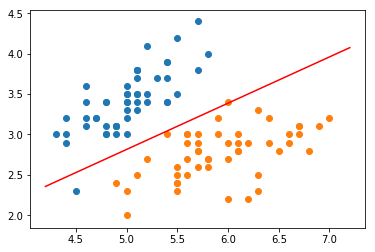

In [18]:
cnt = MaxEpoch -1
print(cnt+1)
params = params_path[cnt]
plt.scatter(x='sepal_length', y='sepal_width', data=df[df.label==0])
plt.scatter(x='sepal_length', y='sepal_width', data=df[df.label==1])
x_space = np.linspace(4.2, 7.2, 100)
y_space = x_space * (params[0] / - params[1]) + (params[2] / - params[1])
plt.plot(x_space, y_space, c='r')
plt.show()

In [19]:
print('accuarcy: {}'.format(len(result[result.TF == 1]) / len(result)))

accuarcy: 0.98


In [20]:
result.head()

,valid_label,pred_label,TF,proba
0,0,0,1,1.000000
1,0,0,1,0.999998
2,0,0,1,1.000000
3,0,0,1,1.000000
4,0,0,1,1.000000
